In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df  = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## ONE HOT ENCODING

In [2]:
df.value_counts("region")

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

In [3]:
pd.get_dummies(df,columns=["region"]).head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,32,male,28.880,0,no,3866.85520,False,True,False,False


### Region column ni vategoriyalarga bo;lib oldim va bo'r ustunlarda True yo'q larda esa False

In [4]:
pd.get_dummies(df,columns=["region"],dtype="int").head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


### True False ni int ga yani 1 yoki 0 ga otkazdim

In [5]:
pd.get_dummies(df,columns=["region"],dtype="int",drop_first=True).head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


### Shakilangan cotegoriya regionni birinchi ustuni ochirib tashladim, bunda agar qo'ldgan ustunlarda 0 boladigon bo'lsa demak u "region_northeast" ustuni bo'ladi

In [6]:
pd.get_dummies(df,columns=["sex"],dtype="int",drop_first=True, prefix_sep=" ",prefix="JINS")

,age,bmi,children,smoker,region,charges,JINS male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


### "Sex" ustunini one hot encodinga otzdik va nomini ozgartirdim, bular hammasi Data Frame ga tasir qilmaydi chunki natijalarni ozlashtirmauabman

## LABEL / INTERGERS ENCODING

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.value_counts("age").head()

age
18    69
19    68
20    29
48    29
47    29
Name: count, dtype: int64

In [9]:
le.fit(df["age"])

LabelEncoder()

In [10]:
le.classes_

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [11]:
le.transform(df["age"])

array([ 1,  0, 10, ...,  0,  3, 43])

In [12]:
df["new_age"] = le.fit_transform(df["age"])
df.head()

,age,sex,bmi,children,smoker,region,charges,new_age
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,10
3,33,male,22.705,0,no,northwest,21984.47061,15
4,32,male,28.880,0,no,northwest,3866.85520,14


### Umumiy hulosa "Age" ustunini olib label integer encodinga otkazdim va uni yangi ustun new_age ga ozlashtirdim

In [13]:
df.value_counts("age").head()

age
18    69
19    68
20    29
48    29
47    29
Name: count, dtype: int64

In [14]:
df.value_counts("new_age").head()

new_age
0     69
1     68
2     29
30    29
29    29
Name: count, dtype: int64

### Buyerda "age" va "new_age" ni farqini ko'rsa bo'ladi

## OUTLIER ENGINEERIN

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,new_age
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,10
3,33,male,22.705,0,no,northwest,21984.47061,15
4,32,male,28.880,0,no,northwest,3866.85520,14


<Axes: ylabel='bmi'>

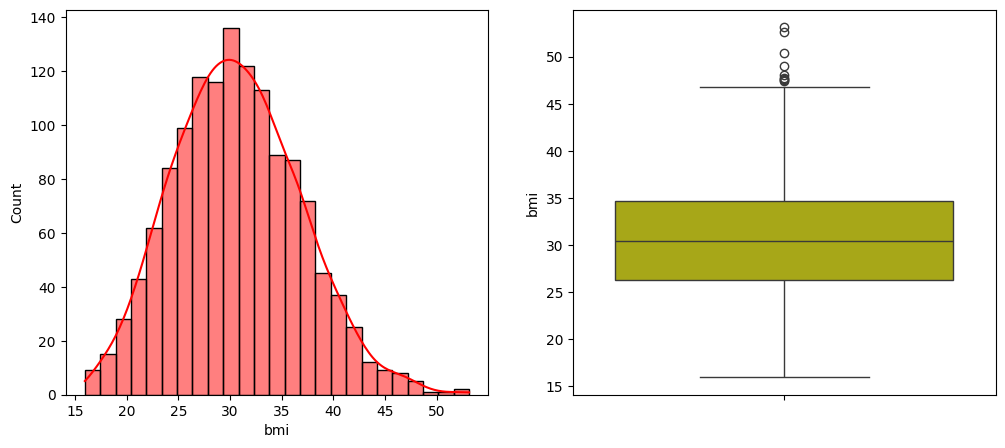

In [16]:
fig,ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=df, x="bmi",ax=ax[0],color="r",kde=True)
sns.boxplot(df, y="bmi",color="y")

### 1 - USUL

Text(0.5, 1.0, 'Without Outliers')

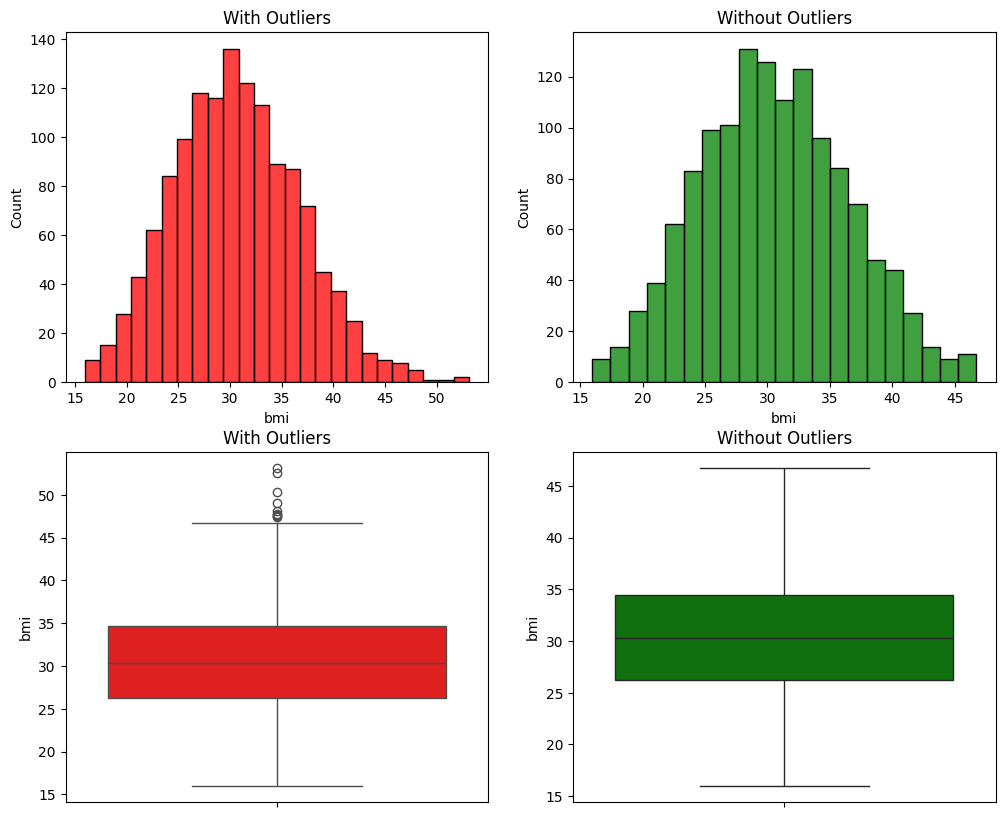

In [17]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

IQR = df["bmi"].quantile(0.75) - df["bmi"].quantile(0.25)

lower_limit = df["bmi"].quantile(0.25) - IQR * 1.5
upper_limit = df["bmi"].quantile(0.75) + IQR * 1.5

filltered_df = df[(df['bmi'] >= lower_limit) & (df["bmi"] <= upper_limit)]

sns.histplot(data=df, x="bmi",ax=ax[0,0],color="r")
ax[0,0].set_title("With Outliers")
sns.histplot(data=filltered_df, x="bmi",ax=ax[0,1],color="g")
ax[0,1].set_title("Without Outliers")

sns.boxplot(data=df, y="bmi",ax=ax[1,0],color="r")
ax[1,0].set_title("With Outliers")

sns.boxplot(data=filltered_df, y="bmi",ax=ax[1,1],color='g')
ax[1,1].set_title("Without Outliers")


### 2 - USUL

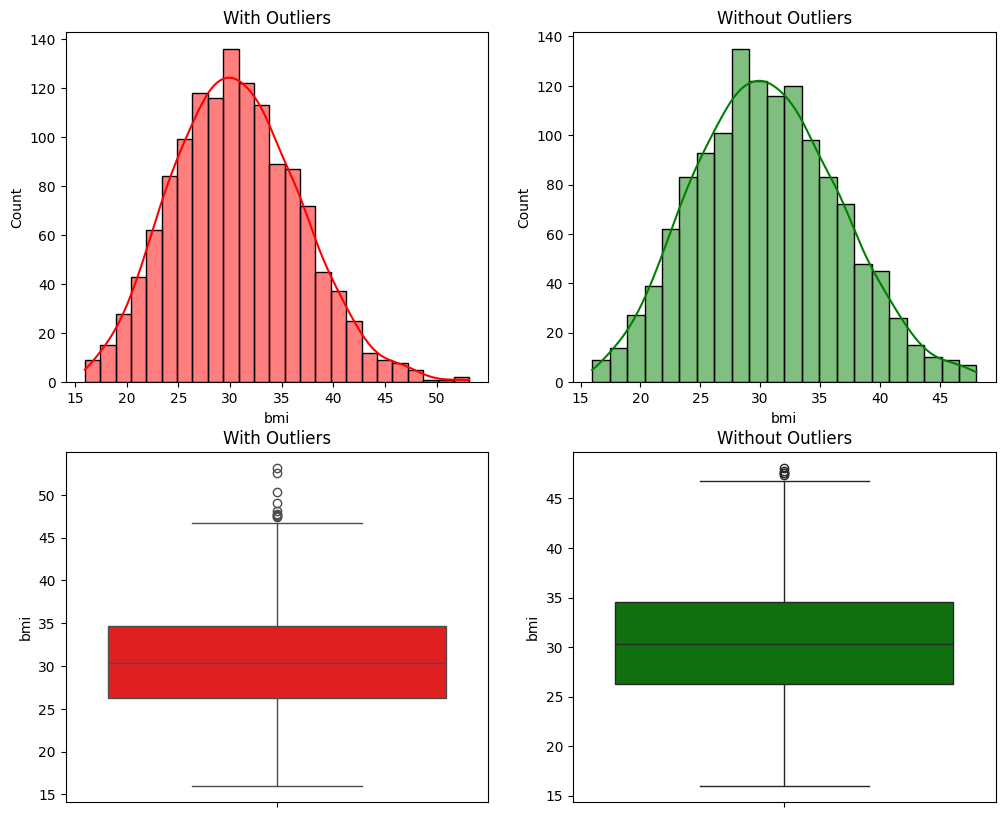

In [18]:
fig,ax  = plt.subplots(2,2, figsize=(12,10))

mean_df = df["bmi"].mean()
std_df = df["bmi"].std()

upper_limit = mean_df + 3 * std_df
lower_limit = mean_df - 3 * std_df

filltered_df_2 = df[(df['bmi'] >= lower_limit) & (df["bmi"] <= upper_limit)]

sns.histplot(data=df, x="bmi",ax=ax[0,0],color="r",kde=True)
ax[0,0].set_title("With Outliers")
sns.histplot(data=filltered_df_2, x="bmi",ax=ax[0,1],color="g",kde=True)
ax[0,1].set_title("Without Outliers")

sns.boxplot(data=df, y="bmi",ax=ax[1,0],color="r")
ax[1,0].set_title("With Outliers")

sns.boxplot(data=filltered_df_2, y="bmi",ax=ax[1,1],color='g')
ax[1,1].set_title("Without Outliers")
plt.show()


### 3 - USUL

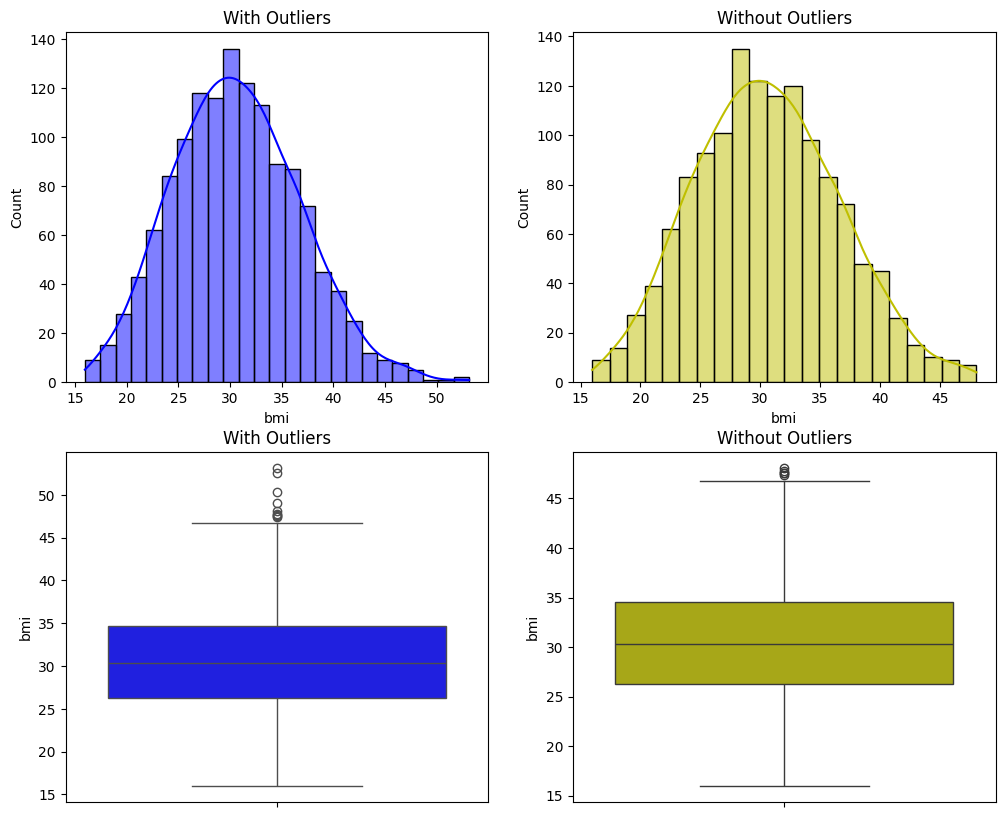

In [19]:
fig,ax  = plt.subplots(2,2, figsize=(12,10))

mean_df = df["bmi"].mean()
std_df = df["bmi"].std()

upper_limit = mean_df + 3 * std_df
lower_limit = mean_df - 3 * std_df

filltered_df_2 = df[(df['bmi'] >= lower_limit) & (df["bmi"] <= upper_limit)]

sns.histplot(data=df, x="bmi",ax=ax[0,0],color="b",kde=True)
ax[0,0].set_title("With Outliers")
sns.histplot(data=filltered_df_2, x="bmi",ax=ax[0,1],color="y",kde=True)
ax[0,1].set_title("Without Outliers")

sns.boxplot(data=df, y="bmi",ax=ax[1,0],color="b")
ax[1,0].set_title("With Outliers")

sns.boxplot(data=filltered_df_2, y="bmi",ax=ax[1,1],color='y')
ax[1,1].set_title("Without Outliers")
plt.show()